In [1]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import pearsonr, spearmanr

import pyBigWig
import pysam

from Modules import utils, plot_utils

Useful global variables

In [2]:
importlib.reload(utils)
importlib.reload(plot_utils)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
# plt.rcParams.update({'axes.labelsize': 16})
with open("/home/alex/shared_folder/Human/T2T-CHM13v2.0_NCBI2UCSC.txt") as f:
    T2T_to_ucsc = dict(line.split() for line in f.readlines())

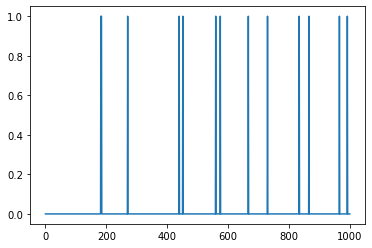

In [3]:
bwfile = "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_paired_T2T_mid_points.bw"
start = 0
stop = 1000
with pyBigWig.open(bwfile) as bw:
    signal = bw.values("NC_060925.1", 0, -1, numpy=True)
plt.plot(np.arange(start, stop), signal[start:stop])

Compute quantiles ans sums

In [3]:
bwfiles = {
    # "Ctrl": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T.bw",
    # "IP1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T.bw",
    # "IP2": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T.bw",
    # "Ctrl_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T_properonce.bw",
    # "IP1_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T_properonce.bw",
    # "IP2_pp1": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T_properonce.bw",
    # "Ctrl_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T_properonce_minmapq3.bw",
    # "IP1_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T_properonce_minmapq3.bw",
    # "IP2_pp1_mm3": "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T_properonce_minmapq3.bw",
    # "167_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2020": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2020_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2020_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw",
    # "167_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "167_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197a_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "197b_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2023_1": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170_CPM.bw",
    # "237_2023_2": "/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170_CPM.bw",
}

In [4]:
# Compute quantiles and sums
q_list = np.array([0.9, 0.95, 0.99, 0.999])
quantiles = {}
sums = {}
clipped_sums = {}
for file_id, bwfile in bwfiles.items():
    signals = utils.load_bw(bwfile, nantonum=False)
    full = np.concatenate(list(signals.values()))
    quantiles[bwfile] = np.quantile(full, q_list)
    sums[bwfile] = sum(np.sum(v) for v in signals.values())
    q99 = quantiles[bwfile][np.where(q_list == 0.99)]
    clipped_sums[bwfile] = sum(
        np.sum(np.clip(v, a_min=None, a_max=q99)) for v in signals.values()
    )
# Save quantiles
quantiles = pd.DataFrame(quantiles, index=[f"quantile_{q}" for q in q_list]).T
quant_filename = utils.safe_filename(
    "/home/alex/shared_folder/JB_seqdes/Projet_Julien/quantiles_mnase_v3.csv"
)
quantiles.to_csv(quant_filename)
print(quantiles)
# Save sums
df_sums = pd.DataFrame(sums, index=["Total_counts"], columns=sums.keys()).T
df_sums["Clip_q0.99_total_counts"] = clipped_sums.values()
df_sums = df_sums.astype(int)
sums_filename = utils.safe_filename(
    "/home/alex/shared_folder/JB_seqdes/Projet_Julien/sums_mnase_v3.csv"
)
df_sums.to_csv(sums_filename)
df_sums

Building parent directories
                                                    quantile_0.9  \
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.083500   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.399200   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     20.277300   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.061300   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     14.650700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.675100   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     24.659700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     20.208700   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.612000   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     22.214001   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     21.867201   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     21.016100   
/home/alex/shared_folder/JB_seqdes/Projet_Julie...     19.576799   

                   

,Total_counts,Clip_q0.99_total_counts
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw,143227519,97099815
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw,155930014,149487376
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw,156661848,149503900
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw,140108375,95070965
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw,133967415,90932126
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw,150634188,142569793
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw,151880449,144018331
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw,152833859,148244860
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw,153391649,148789898
/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw,154414527,148243269


In [4]:
# Compute quantiles
q_list = [0.9, 0.95, 0.99, 0.999]
quantiles = {}
for file_id, bwfile in bwfiles.items():
    signals = utils.load_bw(bwfile, nantonum=False)
    full = np.concatenate(list(signals.values()))
    quantiles[bwfile] = np.quantile(full, q_list)
quantiles = pd.DataFrame(quantiles, index=[f"quantile_{q}" for q in q_list]).T
filename = utils.safe_filename(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/quantiles_run2.csv"
)
quantiles.to_csv(filename)
quantiles

In [6]:
# Compute sum, and thresholded to 99e centile sum
sums = {}
clipped_sums = {}
for file_id, bwfile in bwfiles.items():
    filesum = 0
    clipped_filesum = 0
    with pyBigWig.open(bwfile) as bw:
        for chr_id in bw.chroms():
            values = bw.values(chr_id, 0, -1, numpy=True)
            filesum += np.sum(values)
            np.clip(
                values,
                a_min=None,
                a_max=quantiles.loc[bwfile, "quantile_0.99"],
                out=values,
            )
            clipped_filesum += np.sum(values)
    sums[bwfile] = filesum
    clipped_sums[bwfile] = clipped_filesum
df = pd.DataFrame(sums, index=["Total_counts"], columns=sums.keys()).T
df["Clip_q0.99_total_counts"] = clipped_sums.values()
df = df.astype(int)
filename = utils.safe_filename(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/sums_run2.csv"
)
df.to_csv(filename)
df

,Total_counts,Clip_q0.99_total_counts
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C44_trimmed_run2_paired_T2T.bw,20967397902,20801592514
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/D1145C43_trimmed_run2_paired_T2T.bw,26920413596,26608732992
/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/HN00205099_RawFASTQ_RPE1_WTH3K9me3_run2_paired_T2T.bw,249342779072,246931352992


In [87]:
from saturation_analysis import (
    make_barplot,
    integer_histogram_sample,
    binom_pval,
    get_binned_counts,
)
from Modules.utils import integer_histogram_sample_vect
from statsmodels.stats import multitest

In [140]:
binsize = 1000
ip_counts = get_binned_counts(
    "/home/alex/shared_folder/Judith-H3K4me3/results/alignments/T2T-CHM13v2.0/D1145C41_trimmed_paired_T2T_nodup_mid_points.bw",
    binsize,
    1,
)
ctrl_counts = get_binned_counts(
    "/home/alex/shared_folder/Judith-H3K4me3/results/alignments/T2T-CHM13v2.0/D1145C42_trimmed_paired_T2T_nodup_mid_points.bw",
    binsize,
    1,
)
ip_counts_div10 = integer_histogram_sample(ip_counts, 0.1)
ip_counts_div100 = integer_histogram_sample(ip_counts, 0.01)

(-1.0, 20.0)

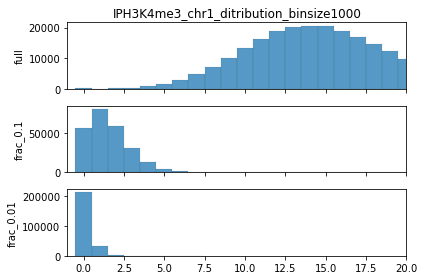

In [141]:
fig, axes = plt.subplots(3, 1, facecolor="w", layout="tight", sharex=True)
sns.histplot(ip_counts, discrete=True, ax=axes[0])
sns.histplot(ip_counts_div10, discrete=True, ax=axes[1])
sns.histplot(ip_counts_div100, discrete=True, ax=axes[2])
axes[0].set_title(f"IPH3K4me3_chr1_ditribution_binsize{binsize}")
for i, ax in enumerate(axes):
    if i == 0:
        ax.set_ylabel("full")
    else:
        ax.set_ylabel(f"frac_{10**(-i)}")
axes[0].set_xlim((-1, 20))

In [120]:
def qcorrect(pval, n_array, method="fdr_bh"):
    valid_bins = n_array != 0
    res = pval.copy()
    _, res[valid_bins], *_ = multitest.multipletests(pval[valid_bins], method=method)
    return res

In [144]:
qvalue = True
fracs = np.insert(np.arange(0.05, 1.05, 0.05), 0, 0.01)
n_signifs = []
for frac in fracs:
    divs = integer_histogram_sample_vect(ip_counts, np.repeat(frac, 10))
    p_arrs = np.sum(divs, axis=1) / np.sum(divs + ctrl_counts.reshape(1, -1), axis=1)
    pvals = []
    for i in range(len(p_arrs)):
        pval = binom_pval(divs[i], divs[i] + ctrl_counts, p_arrs[i])
        if qvalue:
            pval = qcorrect(pval, divs[i] + ctrl_counts)
        pvals.append(pval)
    pvals = np.array(pvals)
    n_signifs.append(np.sum(pvals < 0.05, axis=1))
df = pd.DataFrame(n_signifs, index=fracs).T
df

,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,4,388,1008,1473,1722,1940,2107,2180,2263,2375,...,2490,2515,2549,2601,2660,2684,2710,2719,2730,2740
1,5,398,1103,1474,1728,1977,2120,2190,2284,2387,...,2506,2534,2569,2633,2635,2674,2707,2731,2726,2740
2,0,404,1045,1463,1762,1945,2102,2194,2293,2377,...,2461,2536,2550,2614,2661,2669,2704,2724,2737,2740
3,7,423,1083,1465,1727,1970,2095,2179,2267,2388,...,2509,2516,2575,2626,2658,2665,2708,2717,2724,2740
4,1,401,1021,1500,1734,1927,2109,2186,2268,2348,...,2486,2546,2557,2609,2674,2662,2715,2732,2734,2740
5,16,392,1048,1497,1764,1973,2060,2170,2266,2379,...,2480,2542,2580,2614,2646,2678,2689,2699,2721,2740
6,5,382,990,1481,1716,1964,2125,2187,2261,2411,...,2480,2537,2575,2586,2654,2657,2698,2729,2718,2740
7,6,408,1059,1471,1727,1963,2109,2178,2240,2408,...,2483,2515,2551,2606,2651,2687,2689,2731,2725,2740
8,0,399,1005,1469,1693,1945,2068,2189,2283,2398,...,2503,2508,2553,2597,2645,2681,2687,2745,2707,2740
9,2,397,1041,1489,1702,1961,2122,2174,2258,2377,...,2506,2523,2553,2636,2651,2674,2697,2719,2727,2740


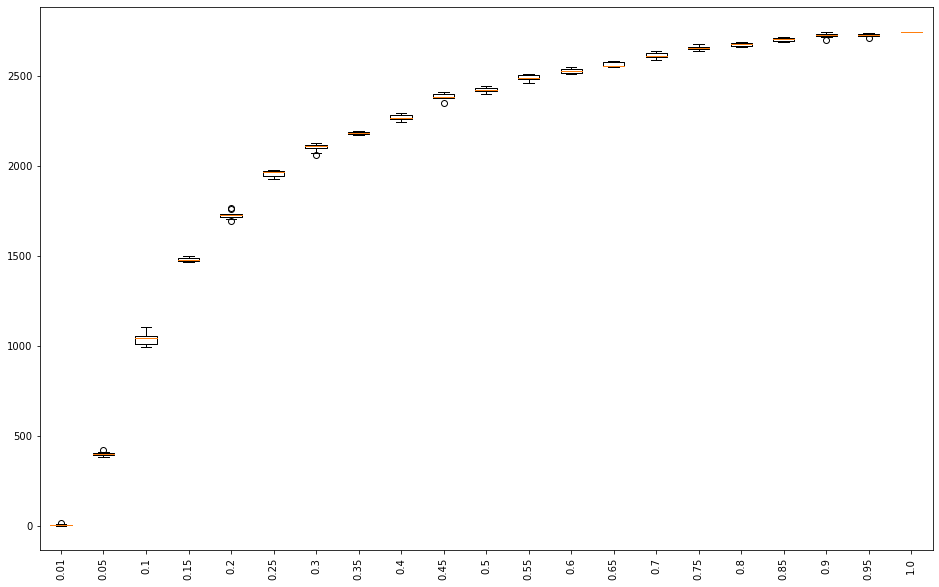

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), facecolor="w")
ax.boxplot(np.array(n_signifs).T)
ax.set_xticklabels(np.round(fracs, 2), rotation=90)
fig.show()

In [128]:
lamb = 2
size = 1000
extra = 20
n_extra = 10
arr = np.random.poisson(lamb, size=size)
arr[:n_extra] += extra
arr2 = np.random.poisson(lamb + n_extra * extra / size, size=size)
print(np.sum(arr), np.sum(arr2))
arr[:20], arr2[:20]

2165 2191


(array([21, 25, 21, 24, 24, 22, 22, 21, 21, 25,  1,  0,  2,  2,  1,  4,  2,
         1,  0,  3]),
 array([2, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 3, 5, 4, 1, 0, 1, 4, 1]))

In [131]:
qvalue = False
fracs = np.arange(0.01, 1.01, 0.01)
n_signifs = []
for frac in fracs:
    divs = integer_histogram_sample_vect(arr, np.repeat(frac, 100))
    p_arrs = np.sum(divs, axis=1) / np.sum(divs + arr2.reshape(1, -1), axis=1)
    pvals = []
    for i in range(len(p_arrs)):
        pval = binom_pval(divs[i], divs[i] + arr2, p_arrs[i])
        if qvalue:
            pval = qcorrect(pval, divs[i] + arr2)
        pvals.append(pval)
    pvals = np.array(pvals)
    n_signifs.append(np.sum(pvals < 0.05, axis=1))
df = pd.DataFrame(n_signifs, index=fracs).T
df

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
0,20,9,8,15,17,8,12,11,11,16,...,22,18,22,20,20,21,19,21,21,21
1,21,21,12,12,18,8,7,12,9,15,...,22,21,22,17,18,18,20,20,21,21
2,21,14,6,10,18,6,13,18,18,17,...,21,20,22,18,19,18,21,20,20,21
3,20,15,14,18,22,14,11,18,10,14,...,20,19,21,18,21,19,19,21,21,21
4,19,18,9,12,17,8,9,13,11,15,...,24,23,24,18,17,20,21,21,20,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,17,9,13,22,10,14,13,14,14,...,22,21,23,20,20,20,20,21,21,21
96,20,10,7,16,23,7,13,17,10,18,...,19,24,22,19,19,20,21,20,19,21
97,20,25,14,9,20,8,13,11,12,15,...,22,22,22,19,19,20,20,20,21,21
98,21,13,9,14,17,12,12,10,10,19,...,22,23,22,18,19,20,20,20,21,21


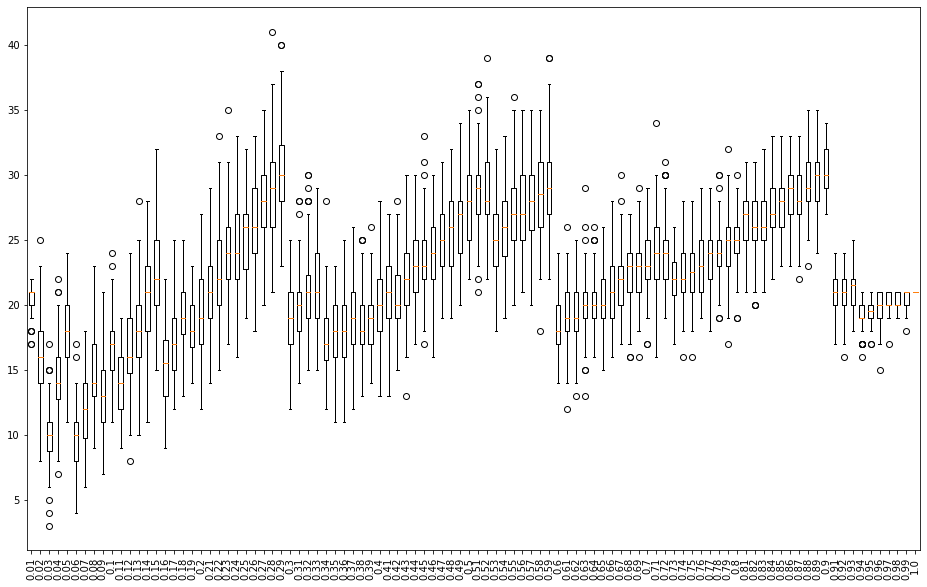

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), facecolor="w")
ax.boxplot(np.array(n_signifs).T)
ax.set_xticklabels(np.round(fracs, 2), rotation=90)
fig.show()

In [85]:
sns.boxplot(df, x)

/home/alex/anaconda3/envs/tf2.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sns.boxplot(pd.DataFrame(ns, columns=fracs))

In [13]:
df = pd.read_csv(
    "/home/alex/shared_folder/Judith-H3K9me3/results/alignments/T2T-CHM13v2.0/saturation_analysis/saturation_IP2_vs_INPUT_powersof10_onlyip.csv",
    index_col=[0, 1],
)
df

IP_cov    Ctrl_cov        IP       Ctrl  Undetermined  \
100     0.001     461721.0  43773977.0  415381.0       83.0    30757302.0   
        0.010    4617207.0  43773977.0  308774.0      198.0    30863794.0   
        0.100   46172066.0  43773977.0  395077.0   265285.0    30512404.0   
        1.000  461720656.0  43773977.0  282898.0  2117618.0    28772250.0   
1000    0.001     461721.0  43773977.0   35490.0       27.0     3081770.0   
        0.010    4617207.0  43773977.0  109957.0     2195.0     3005135.0   
        0.100   46172066.0  43773977.0  221087.0   222863.0     2673337.0   
        1.000  461720656.0  43773977.0  307943.0   351641.0     2457703.0   
10000   0.001     461721.0  43773977.0    9841.0       29.0      301869.0   
        0.010    4617207.0  43773977.0   25830.0    20410.0      265499.0   
        0.100   46172066.0  43773977.0   61925.0    62844.0      186970.0   
        1.000  461720656.0  43773977.0   74247.0    86820.0      150672.0   
100000  0.001     461721.0  43773977.0    2664.0     1924.0       26597.0   
        0.010    4617207.0  43773977.0    7084.0     7846.0       16255.0   
        0.100   46172066.0  43773977.0    8876.0    15573.0        6736.0   
        1.000  461720656.0  43773977.0    9313.0    16960.0        4912.0   
1000000 0.001     461721.0  43773977.0     672.0      707.0        1753.0   
        0.010    4617207.0  43773977.0     960.0     1701.0         471.0   
        0.100   46172066.0  43773977.0    1030.0     1910.0         192.0   
        1.000  461720656.0  43773977.0    1054.0     1938.0         140.0   

               IP_clust  Ctrl_clust  
100     0.001  409364.0        18.0  
        0.010  304997.0        56.0  
        0.100  387113.0    261982.0  
        1.000  275661.0   1935985.0  
1000    0.001   35005.0        14.0  
        0.010  104335.0      2163.0  
        0.100  189189.0    198950.0  
        1.000  240897.0    289362.0  
10000   0.001    9390.0        28.0  
        0.010   19599.0     18338.0  
        0.100   20834.0     40180.0  
        1.000   18352.0     44070.0  
100000  0.001    1985.0      1748.0  
        0.010    1458.0      4472.0  
        0.100    1145.0      2983.0  
        1.000    1112.0      2475.0  
1000000 0.001     321.0       455.0  
        0.010     320.0       386.0  
        0.100     320.0       333.0  
        1.000     322.0       317.0

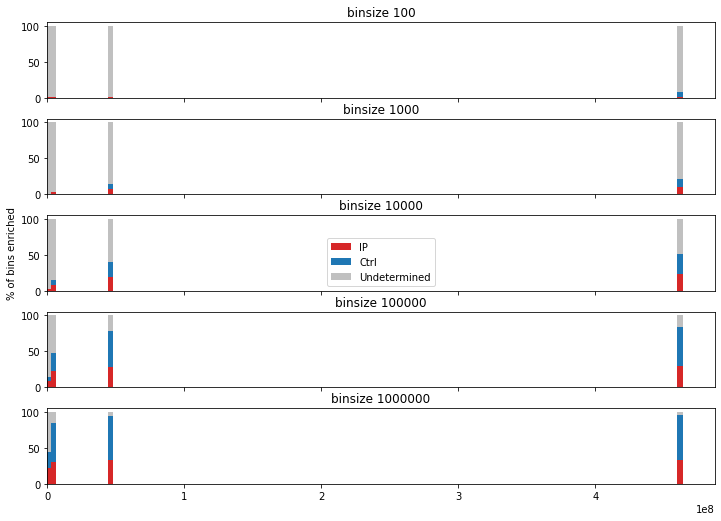

In [14]:
fig = make_barplot(df, x="IP_cov", log_scale=False)
fig.show()

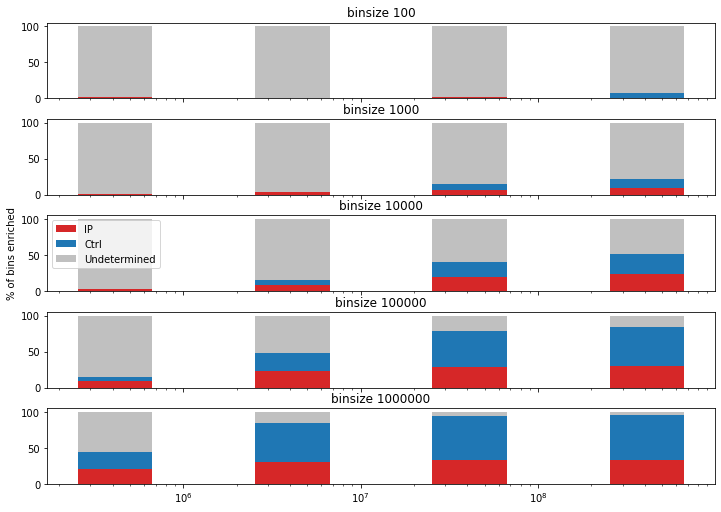

In [15]:
fig = make_barplot(df, x="IP_cov", log_scale=True)
fig.show()